# Gender Differences in University Enrollment

The dataset `universities.csv`for this analysis can be accesses from [National Center for Education Statistics]

This is data from the (https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx). 

We are going to develop **three** plots:
1. A boxplot of the average number of total enrollment for the states in the U.S. West
    * The States in the U.S. West are
        * Alaska
        * Arizona
        * California
        * Colorado
        * Hawaii
        * Idaho
        * Montana
        * Nevada
        * New Mexico
        * Oregon
        * Utah
        * Washington
        * Wyoming (see prepared list `uswest`)
    * Order the plot based on the number of institutions in the state
2. A boxplot of the average number of enrollment per gender category (hue) and state in the U.S. West
    * Please notice that enrollment numbers for men and women are in two separate columns.
    * Hue requires one column, which means you have to 'melt' the dataset ([Link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).
    * The results should be a dataframe with two rows (one for men, one for women) for each university
3. A ordered barplot of the ratio of admissions for men and women for universities in the Bay Area
    * We assume that the Bay Area is characterized with zip codes that start with `950` and `94`
    * Focus on institutions with more than 1,000 enrollments.
    * Develop the ratio of admissions for women and for men. Standardize this ratio on the mean. 
4. Interpretation of the plots in terms of gender differences. 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

In [3]:
c = students = pd.read_csv('universities.csv')

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
uswest = ['AK','AZ','CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

### Filtering the dataset for the states in the U.S. West

Selecting only records which has finite value in the enrollment column

In [6]:
west_df=c[c['STABBR'].isin(uswest)]
west_df=west_df[np.isfinite(west_df['ENRLT'])]
west_df.head()

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM
62,102553,University of Alaska Anchorage,99508,AK,1744.0,776.0,968.0,1738.0,1266.0
64,102614,University of Alaska Fairbanks,99775-7500,AK,775.0,392.0,383.0,587.0,557.0
65,102632,University of Alaska Southeast,99801-8697,AK,162.0,59.0,103.0,115.0,73.0
66,102669,Alaska Pacific University,99508,AK,41.0,15.0,26.0,172.0,89.0
75,103893,Carrington College-Phoenix North,85051-4063,AZ,101.0,15.0,86.0,153.0,27.0


### Boxplot of the dataset for states in U.S. West

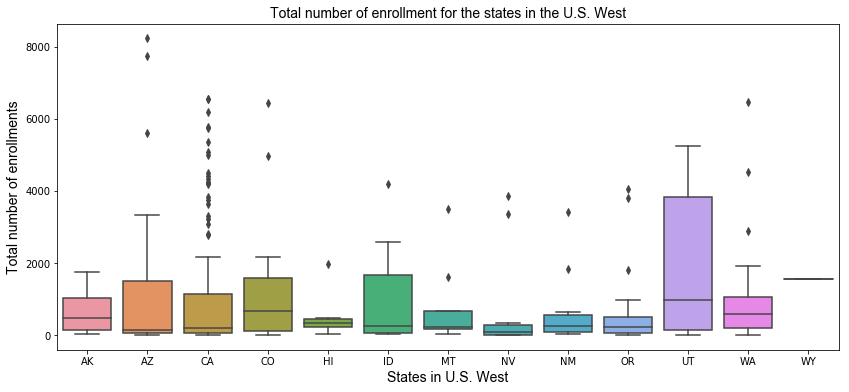

In [7]:
plt.figure(figsize=(14,6))
ax=sn.boxplot(y='ENRLT', x='STABBR',data=west_df)
ax.set_xlabel('States in U.S. West',fontname="Arial", fontsize=14);
ax.set_ylabel('Total number of enrollments',fontname="Arial", fontsize=14);
ax.set_title('Total number of enrollment for the states in the U.S. West',fontname="Arial", fontsize=14);

###  Calculating average number of total enrollment for the states in the U.S. West and sorting the values by number of enrollments per institutions

In [8]:
west_df_enrl=west_df.groupby('STABBR')['ENRLT'].agg(['mean','count']).sort_values(by='count' ).reset_index()
west_df_enrl

,STABBR,mean,count
0,WY,1551.000000,1
1,AK,680.500000,4
2,HI,491.750000,8
3,MT,780.250000,8
4,UT,1935.250000,8
5,ID,1062.444444,9
6,NM,692.900000,10
7,NV,790.200000,10
8,AZ,1575.947368,19
9,CO,1203.833333,24


### Boxplot of average number of total enrollment for the states in the U.S. West, keeping order of the plot based on the number of institutions in the state

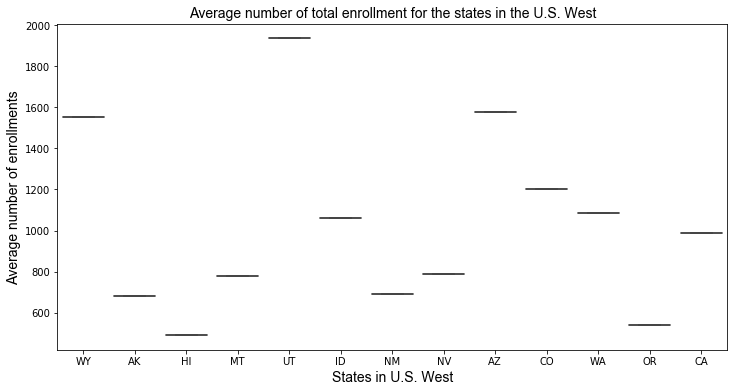

In [9]:
plt.figure(figsize=(12,6)) 
ax=sn.boxplot(y='mean', x='STABBR',data=west_df_enrl);
ax.set_xlabel('States in U.S. West',fontname="Arial", fontsize=14);
ax.set_ylabel('Average number of enrollments',fontname="Arial", fontsize=14);
ax.set_title('Average number of total enrollment for the states in the U.S. West',fontname="Arial", fontsize=14);

### Melting the dataset

The enrollment numbers for men and women are in two separate columns, therefore for hue to function we need to melt the dataset to bring enrollment number of men and women in one column.

In [10]:
west_df_melt=pd.melt(west_df, id_vars=['STABBR','INSTNM'], value_vars=['ENRLM', 'ENRLW'],var_name='ENRL_TYPE',value_name='VALUE')

Checking if melting worked correctly

In [11]:
west_df_melt[west_df_melt['INSTNM']=='University of Alaska Anchorage']

,STABBR,INSTNM,ENRL_TYPE,VALUE
0,AK,University of Alaska Anchorage,ENRLM,776.0
300,AK,University of Alaska Anchorage,ENRLW,968.0


### Calculating the average number of enrollment per gender category (hue) and state in the U.S. West

In [12]:
Gen_enrl_df=pd.DataFrame(west_df_melt.groupby(['STABBR','ENRL_TYPE'])['VALUE'].mean().reset_index())
Gen_enrl_df.sort_values(by='STABBR').head()

,STABBR,ENRL_TYPE,VALUE
0,AK,ENRLM,310.500000
1,AK,ENRLW,370.000000
2,AZ,ENRLM,768.888889
3,AZ,ENRLW,847.263158
4,CA,ENRLM,433.884892


### Plotting the Boxplot for average number of enrollment per gender category (hue) and state in the U.S. West

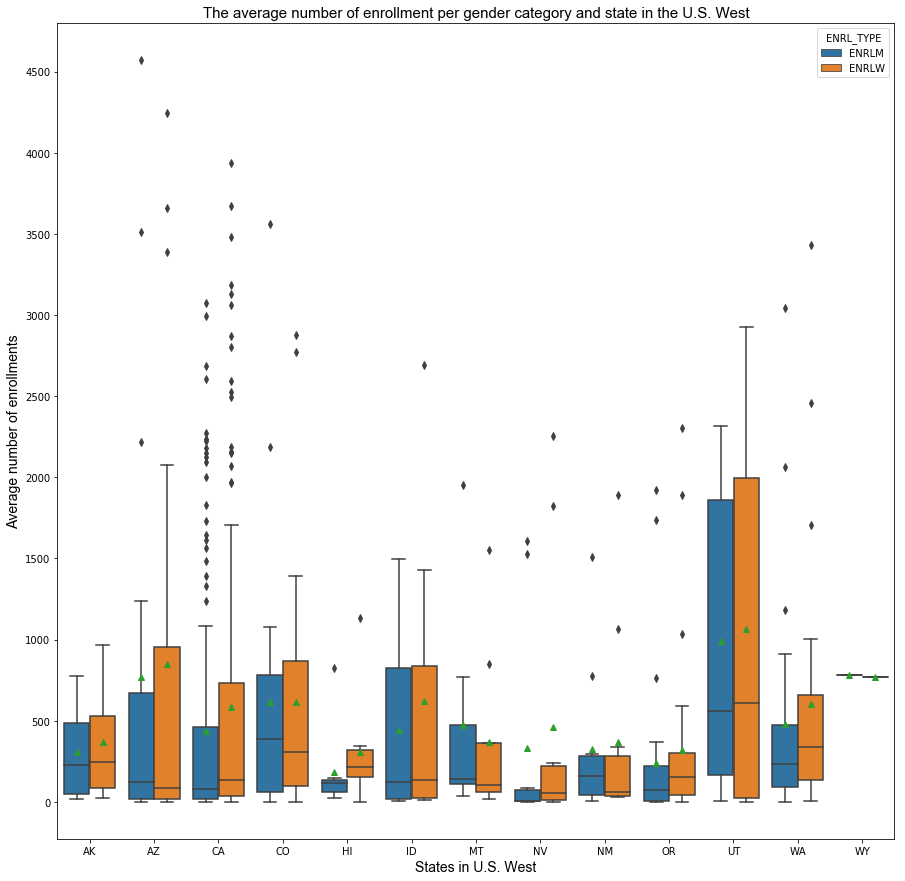

In [13]:
plt.figure(figsize=(15,15))
ax=sn.boxplot(y='VALUE', x='STABBR',hue='ENRL_TYPE', data=west_df_melt, showmeans=True);
ax.set_title("The average number of enrollment per gender category and state in the U.S. West",fontname="Arial", fontsize=15);
ax.set_xlabel('States in U.S. West',fontname="Arial", fontsize=14)
ax.set_ylabel('Average number of enrollments',fontname="Arial", fontsize=14);
plt.yticks(np.arange(0, 4750, 500.0));

### Filtering the dataset for records in Bay Area

We assume that the Bay Area is characterized with zip codes that start with 950 and 94

In [14]:
bay_df=students[students['ZIP'].str.startswith('950') | students['ZIP'].str.startswith('94')]

We will focus on the institution having more than 1000 enrollment

In [15]:
bay_df=bay_df[bay_df['ENRLT'] >1000]

### Calculating ratio of admissions for women and men for universities in the Bay Area

In [16]:
bay_df['Ratio']= bay_df['ADMSSNW']/ bay_df['ADMSSNM']
bay_df

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,Ratio
241,110574,California State University-East Bay,94542,CA,1596.0,588.0,1008.0,7039.0,3891.0,1.809047
246,110635,University of California-Berkeley,94720,CA,6182.0,2997.0,3185.0,7766.0,6209.0,1.250765
254,110714,University of California-Santa Cruz,95064-1011,CA,4221.0,2149.0,2072.0,15883.0,12569.0,1.263665
490,122597,San Francisco State University,94132,CA,3642.0,1483.0,2159.0,15688.0,9016.0,1.740018
492,122612,University of San Francisco,94117-1080,CA,1587.0,576.0,1011.0,7245.0,3666.0,1.976268
505,122931,Santa Clara University,95053,CA,1317.0,650.0,667.0,4271.0,3377.0,1.264732
524,123572,Sonoma State University,94928-3609,CA,1806.0,629.0,1177.0,8307.0,4268.0,1.946345
4247,243744,Stanford University,94305,CA,1739.0,854.0,885.0,1087.0,1031.0,1.054316


### Standardizing the ratio on mean

This can be done by dividing the calculated ratio for each university by the mean of all ratios

In [17]:
# Calculating the mean of all ratio 
bay_df['Ratio'].mean() 

1.5381444208883028

In [18]:
bay_df['Std_Mean']=bay_df['Ratio']/bay_df['Ratio'].mean()
bay_df=bay_df.sort_values(by='Std_Mean')
bay_df

,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,Ratio,Std_Mean
4247,243744,Stanford University,94305,CA,1739.0,854.0,885.0,1087.0,1031.0,1.054316,0.685447
246,110635,University of California-Berkeley,94720,CA,6182.0,2997.0,3185.0,7766.0,6209.0,1.250765,0.813165
254,110714,University of California-Santa Cruz,95064-1011,CA,4221.0,2149.0,2072.0,15883.0,12569.0,1.263665,0.821551
505,122931,Santa Clara University,95053,CA,1317.0,650.0,667.0,4271.0,3377.0,1.264732,0.822245
490,122597,San Francisco State University,94132,CA,3642.0,1483.0,2159.0,15688.0,9016.0,1.740018,1.131245
241,110574,California State University-East Bay,94542,CA,1596.0,588.0,1008.0,7039.0,3891.0,1.809047,1.176123
524,123572,Sonoma State University,94928-3609,CA,1806.0,629.0,1177.0,8307.0,4268.0,1.946345,1.265385
492,122612,University of San Francisco,94117-1080,CA,1587.0,576.0,1011.0,7245.0,3666.0,1.976268,1.284839


### Plotting the Barplot for the ratio of admissions for women and men for universities in the Bay Area

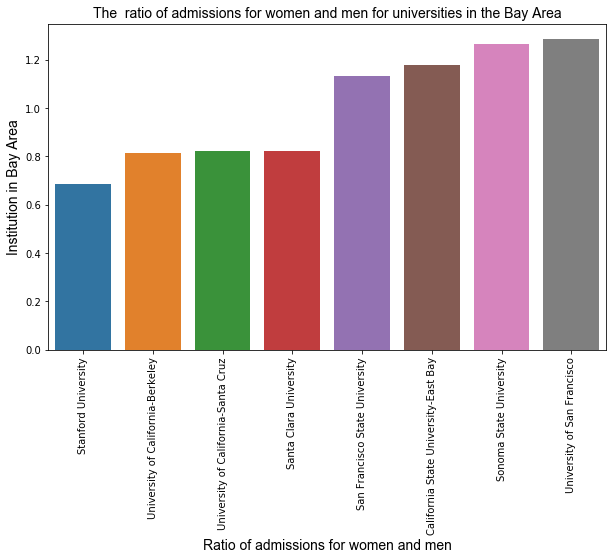

In [19]:
plt.figure(figsize=(10,6))
ax = sn.barplot(x="INSTNM", y="Std_Mean", data=bay_df)
ax.set_title("The  ratio of admissions for women and men for universities in the Bay Area",fontname="Arial", fontsize=14);
ax.set_xlabel('Ratio of admissions for women and men',fontname="Arial", fontsize=14);
ax.set_ylabel('Institution in Bay Area',fontname="Arial", fontsize=14 );
plt.xticks(rotation=90);

# Interpretation of all the plots 

#### Interpretation of Plot 1

As plot 1 is generated on mean data, it is shown in the form of single line. Had the box plot been generated on the complete dataset instead of average values, it would have been more clear.

It can be seen that the average enrollment in universities is not dependent on the number of institutions in the state.

#### Interpretation of Plot 2

Plot 2 shows the average number of enrollment per gender category and state in the U.S. West. 

Mean values are indicated by green triangle and there is strong influence of outliers on the average.

Based on the plot it can be depicted that the average number of enrollemt for women is more than men in most of the states.

#### Interpretation of Plot 3

While seeing the data for institution in the bay area for more than 1000 enrollments, the number of women admission is more than men.

University of San Francisco has the highest women to men enrollment standarized to mean ratio which is near to mean ratio. That tells that this University give preferences to women applicants and there is maximum difference in university enrollment based on gender.

Stanford University has the maximum deviation from mean ratio of women to men enrollments. So this can be said that number of enrollment for men is comparable and there is not much of difference in admission based on gender.

